# Table of Contents
 <p>

In [1]:
%pylab inline
from __future__ import division
from collections import Counter
from Bio import SeqIO
from pyseqlogo.pyseqlogo import draw_logo
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

Populating the interactive namespace from numpy and matplotlib


In [2]:
!wget -c ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_27/gencode.v27.pc_translations.fa.gz

--2018-03-17 22:44:49--  ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_27/gencode.v27.pc_translations.fa.gz
           => ‘gencode.v27.pc_translations.fa.gz’
Resolving ftp.ebi.ac.uk... 193.62.192.4
Connecting to ftp.ebi.ac.uk|193.62.192.4|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/databases/gencode/Gencode_human/release_27 ... done.
==> SIZE gencode.v27.pc_translations.fa.gz ... 11408050
File has already been retrieved.
2018-03-17 22:44:50 (0.00 B/s) - ‘gencode.v27.pc_translations.fa.gz’ saved [11408050]



In [3]:
human_aa_fasta = './gencode.v27.pc_translations.fa.gz'
human_aa = Counter()
with open(human_aa_fasta) as f:
    for record in SeqIO.parse(f, 'fasta'):
        human_aa+=Counter(record.seq)

In [4]:
human_total = sum(list(human_aa.viewvalues()))

merry = ['M', 'E', 'R', 'R', 'Y']
christmas = ['C', 'H', 'R', 'I', 'S', 'T', 'M', 'A', 'S']

data_merry = [[(x, 200*float(human_aa[x])/human_total)] for x in merry]
data_christmas = [[(x, 200*float(human_aa[x])/human_total)] for x in christmas]

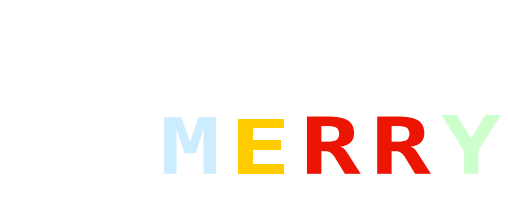

In [5]:
_, _ = draw_logo(data_merry, 
                 coordinate_type='display', 
                 data_type='bits', 
                 yaxis='probability',
                 colorscheme='physiochemical',
                 fontfamily='Monospace')
plt.savefig('merry.png', dpi=300)

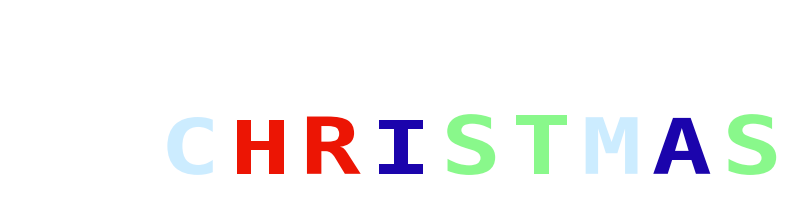

In [6]:
_, _ = draw_logo(data_christmas, 
                 data_type='bits', 
                 colorscheme='physiochemical', 
                 yaxis='probability',
                 coordinate_type='display',
                 fontfamily='Monospace')
plt.savefig('christmas.png', dpi=300)